# This example shows how to use the GFMM classifier using an agglomerative learning algorithm with full similarity matrix (AGGLO-SM)

Note that the numerical features in training and testing datasets must be in the range of [0, 1] because the GFMM classifiers with AGGLO-SM algorithm require features in the unit cube.

## 1. Execute directly from the python file

In [1]:
%matplotlib notebook

In [2]:
import os
import warnings
warnings.filterwarnings('ignore')

#### Get the path to the this jupyter notebook file

In [3]:
this_notebook_dir = os.path.dirname(os.path.abspath("__file__"))
this_notebook_dir

'C:\\hyperbox-brain\\examples\\numerical_data\\batch_learner'

#### Get the home folder of the Hyperbox-Brain project

In [4]:
from pathlib import Path
project_dir = Path(this_notebook_dir).parent.parent.parent
project_dir

WindowsPath('C:/hyperbox-brain')

#### Create the path to the Python file containing the implementation of the GFMM classifier using the agglomerative learning algorithm with full similarity matrix

In [5]:
agglo_sm_file_path = os.path.join(project_dir, Path("hbbrain/numerical_data/batch_learner/agglo_gfmm.py"))
agglo_sm_file_path

'C:\\hyperbox-brain\\hbbrain\\numerical_data\\batch_learner\\agglo_gfmm.py'

#### Run the found file by showing the execution directions

In [6]:
!python "{agglo_sm_file_path}" -h

usage: agglo_gfmm.py [-h] -training_file TRAINING_FILE -testing_file
                     TESTING_FILE [--theta THETA] [--gamma GAMMA]
                     [--min_simil MIN_SIMIL]
                     [--simil_measure {mid,long,short}]
                     [--asimil_type {min,max}] [--is_draw IS_DRAW]

The description of parameters

required arguments:
  -training_file TRAINING_FILE
                        A required argument for the path to training data file
                        (including file name)
  -testing_file TESTING_FILE
                        A required argument for the path to testing data file
                        (including file name)

optional arguments:
  --theta THETA         Maximum hyperbox size (in the range of (0, 1])
                        (default: 0.5)
  --gamma GAMMA         A sensitivity parameter describing the speed of
                        decreasing of the membership function in each
                        dimension (larger than 0) (default: 1)


#### Create the path to training and testing datasets stored in the dataset folder

In [7]:
training_data_file = os.path.join(project_dir, Path("dataset/syn_num_train.csv"))
training_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_train.csv'

In [8]:
testing_data_file = os.path.join(project_dir, Path("dataset/syn_num_test.csv"))
testing_data_file

'C:\\hyperbox-brain\\dataset\\syn_num_test.csv'

#### Run a demo program

In [9]:
!python "{agglo_sm_file_path}" -training_file "{training_data_file}" -testing_file "{testing_data_file}" --theta 0.1 --min_simil 0.5 --simil_measure "short" --asimil_type "max" --gamma 1

Number of hyperboxes = 63
Testing accuracy (using a probability measure for samples on the boundary) =  85.10%
Testing accuracy (using a Manhattan distance for samples on the boundary) =  85.10%


## 2. Using the GFMM classifier with the agglomerative learning algorithm with full similarity matrix through its init, fit, and predict functions

In [10]:
from hbbrain.numerical_data.batch_learner.agglo_gfmm import AgglomerativeLearningGFMM
import pandas as pd

#### Create training and testing data sets

In [11]:
df_train = pd.read_csv(training_data_file, header=None)
df_test = pd.read_csv(testing_data_file, header=None)

Xy_train = df_train.to_numpy()
Xy_test = df_test.to_numpy()

Xtr = Xy_train[:, :-1]
ytr = Xy_train[:, -1]

Xtest = Xy_test[:, :-1]
ytest = Xy_test[:, -1]

#### Initializing parameters

In [12]:
theta = 0.1
min_simil = 0.5
simil_measure = 'short'
asimil_type = 'max'
gamma = 1
is_draw = True

### Training

<IPython.core.display.Javascript object>


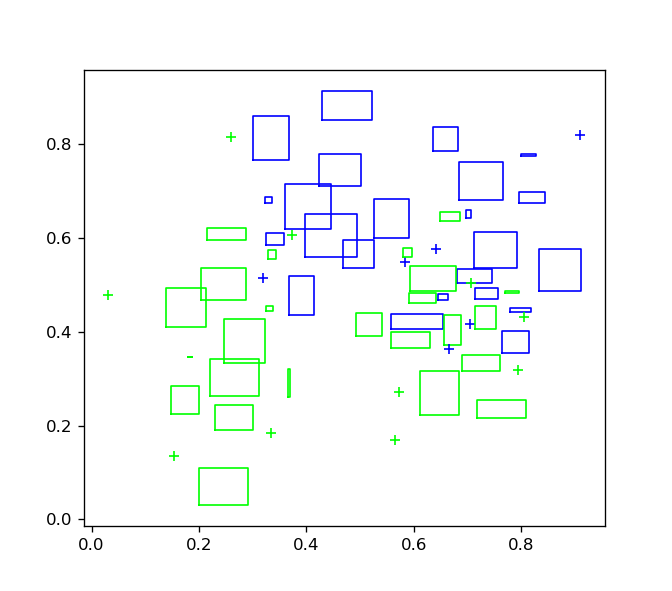

AgglomerativeLearningGFMM(is_draw=True, simil_measure='short', theta=0.1)

In [13]:
agglo_gfmm_clf = AgglomerativeLearningGFMM(theta=theta, min_simil=min_simil, simil_measure=simil_measure, asimil_type=asimil_type, gamma=gamma, is_draw=is_draw)
agglo_gfmm_clf.fit(Xtr, ytr)

#### The code below shows how to display decision boundaries among classes if input data are 2-dimensional

<IPython.core.display.Javascript object>


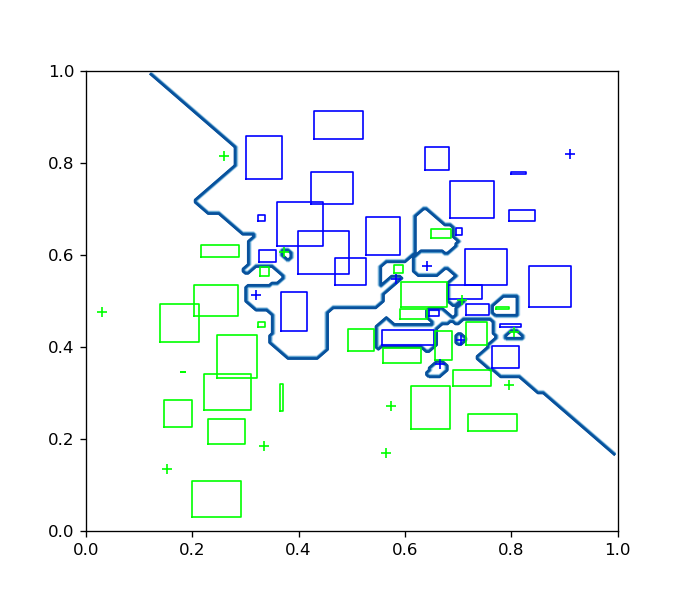

In [14]:
agglo_gfmm_clf.draw_hyperbox_and_boundary("The trained GFMM classifier and its decision boundaries")

In [15]:
print("Number of existing hyperboxes = %d"%(agglo_gfmm_clf.get_n_hyperboxes()))

Number of existing hyperboxes = 63


In [16]:
print("Training time = %f (s)"%agglo_gfmm_clf.elapsed_training_time)

Training time = 41.207006 (s)


### Prediction

In [17]:
from sklearn.metrics import accuracy_score
from hbbrain.constants import MANHATTAN_DIS

In [18]:
y_pred = agglo_gfmm_clf.predict(Xtest)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy (using a probability measure for samples on the boundary) = {acc * 100: .2f}%')

Accuracy (using a probability measure for samples on the boundary) =  85.10%


In [19]:
y_pred = agglo_gfmm_clf.predict(Xtest, MANHATTAN_DIS)
acc = accuracy_score(ytest, y_pred)
print(f'Accuracy (using a Manhattan distance for samples on the boundary) = {acc * 100: .2f}%')

Accuracy (using a Manhattan distance for samples on the boundary) =  85.10%


### Explaining the predicted result for the input sample by showing membership values and hyperboxes for each class

In [20]:
sample_need_explain = 10
y_pred_input_0, mem_val_classes, min_points_classes, max_points_classes = agglo_gfmm_clf.get_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain])

In [21]:
print("Predicted class for sample X = [%f, %f] is %d and real class is %d" % (Xtest[sample_need_explain, 0], Xtest[sample_need_explain, 1], y_pred_input_0, ytest[sample_need_explain]))

Predicted class for sample X = [0.571640, 0.233700] is 2 and real class is 2


In [22]:
print("Membership values:")
for key, val in mem_val_classes.items():
    print("Class %d has the maximum membership value = %f" % (key, val))
    
for key in min_points_classes:
    print("Class %d has the representative hyperbox: V = %s and W = %s" % (key, min_points_classes[key], max_points_classes[key]))

Membership values:
Class 1 has the maximum membership value = 0.870180
Class 2 has the maximum membership value = 0.961410
Class 1 has the representative hyperbox: V = [0.66562 0.36352] and W = [0.66562 0.36352]
Class 2 has the representative hyperbox: V = [0.57285 0.27229] and W = [0.57285 0.27229]


### Show input sample and hyperboxes belonging to each class. In 2D, we can show rectangles or use parallel coordinates

#### Using rectangles to show explanations

<IPython.core.display.Javascript object>


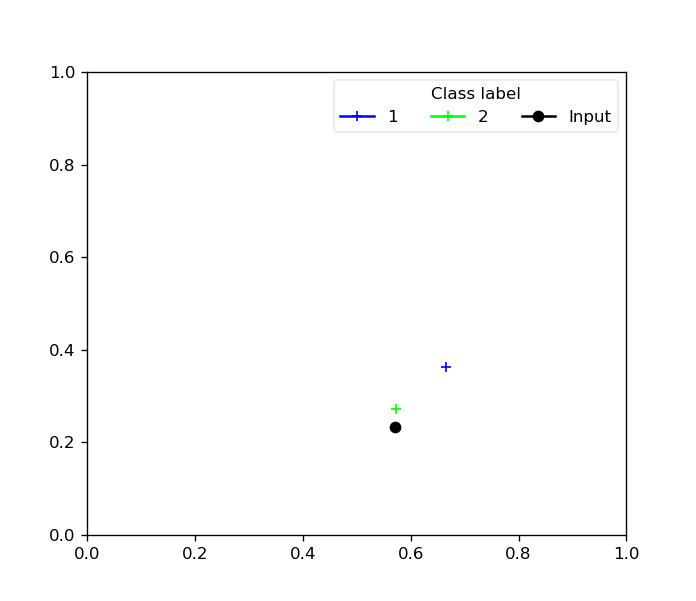

In [23]:
agglo_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0, "2D")

#### Using parallel coordinates. This mode best fits for any dimensions

In [24]:
agglo_gfmm_clf.show_sample_explanation(Xtest[sample_need_explain], Xtest[sample_need_explain], min_points_classes, max_points_classes, y_pred_input_0)